<a href="https://colab.research.google.com/github/msatmod/R/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Support Vector Machine

In [ ]:
#read csv file
customer_churn <- read.csv('../input/churn/CustomerChurn-TelecomUsage.csv')
head(customer_churn)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,RoamMins
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,0,128,1,1,2.7,1,265.1,110,89,10.0
2,0,107,1,1,3.7,1,161.6,123,82,13.7
3,0,137,1,0,0.0,0,243.4,114,52,12.2
4,0,84,0,0,0.0,2,299.4,71,57,6.6
5,0,75,0,0,0.0,3,166.7,113,41,10.1
6,0,118,0,0,0.0,0,223.4,98,57,6.3


In [ ]:
str(customer_churn)

'data.frame':	3333 obs. of  10 variables:
 $ Churn          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AccountWeeks   : int  128 107 137 84 75 118 121 147 117 141 ...
 $ ContractRenewal: int  1 1 1 0 0 0 1 0 1 0 ...
 $ DataPlan       : int  1 1 0 0 0 0 1 0 0 1 ...
 $ DataUsage      : num  2.7 3.7 0 0 0 0 2.03 0 0.19 3.02 ...
 $ CustServCalls  : int  1 1 0 2 3 0 3 0 1 0 ...
 $ DayMins        : num  265 162 243 299 167 ...
 $ DayCalls       : int  110 123 114 71 113 98 88 79 97 84 ...
 $ MonthlyCharge  : num  89 82 52 57 41 57 87.3 36 63.9 93.2 ...
 $ RoamMins       : num  10 13.7 12.2 6.6 10.1 6.3 7.5 7.1 8.7 11.2 ...


In [ ]:
install.packages('plyr')
library(plyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
customer_churn$Churn <- sapply(customer_churn$Churn, factor)


In [ ]:
str(customer_churn)

'data.frame':	3333 obs. of  10 variables:
 $ Churn          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AccountWeeks   : int  128 107 137 84 75 118 121 147 117 141 ...
 $ ContractRenewal: int  1 1 1 0 0 0 1 0 1 0 ...
 $ DataPlan       : int  1 1 0 0 0 0 1 0 0 1 ...
 $ DataUsage      : num  2.7 3.7 0 0 0 0 2.03 0 0.19 3.02 ...
 $ CustServCalls  : int  1 1 0 2 3 0 3 0 1 0 ...
 $ DayMins        : num  265 162 243 299 167 ...
 $ DayCalls       : int  110 123 114 71 113 98 88 79 97 84 ...
 $ MonthlyCharge  : num  89 82 52 57 41 57 87.3 36 63.9 93.2 ...
 $ RoamMins       : num  10 13.7 12.2 6.6 10.1 6.3 7.5 7.1 8.7 11.2 ...


In [ ]:
#split the data
sample_split <- floor(.7 *nrow(customer_churn))
set.seed(1)

In [ ]:
training <- sample(seq_len(nrow(customer_churn)), size=sample_split)
churn_train <- customer_churn[training,]
churn_test <- customer_churn[-training,]

In [ ]:
#support vector machine
install.packages('e1071')
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
svm_churn <- svm(Churn ~ ., churn_train)

In [ ]:
library(caret)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




In [ ]:
confusionMatrix(churn_train$Churn, predict(svm_churn), positive='1')

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1966   21
         1  169  177
                                          
               Accuracy : 0.9186          
                 95% CI : (0.9067, 0.9293)
    No Information Rate : 0.9151          
    P-Value [Acc > NIR] : 0.2911          
                                          
                  Kappa : 0.6085          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.89394         
            Specificity : 0.92084         
         Pos Pred Value : 0.51156         
         Neg Pred Value : 0.98943         
             Prevalence : 0.08487         
         Detection Rate : 0.07587         
   Detection Prevalence : 0.14831         
      Balanced Accuracy : 0.90739         
                                          
       'Positive' Class : 1               
                        

In [ ]:
#test data
Prediction <- predict(svm_churn, churn_test[-1])
prediction_results <- table(pred=Prediction, true=churn_test[,1])
print(prediction_results)

    true
pred   0   1
   0 854  74
   1   9  63


### Naive Bayes Classifier

In [ ]:
#load the necessary packages
install.packages('mlbench')
library(e1071)
library(plyr)
library(caret)
library(mlbench)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#load and verify data
bank_loan <- read.csv('../input/bank-loan-default/Bank_Loan_Default.csv')
head(bank_loan)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,residence,age,otherplans,cards,tele
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>
1,0,A11,6,A34,A43,1169,A65,A75,4,4,67,A143,2,A192
2,1,A12,48,A32,A43,5951,A61,A73,2,2,22,A143,1,A191
3,0,A14,12,A34,A46,2096,A61,A74,2,3,49,A143,1,A191
4,0,A11,42,A32,A42,7882,A61,A74,2,4,45,A143,1,A191
5,1,A11,24,A33,A40,4870,A61,A73,3,4,53,A143,2,A191
6,0,A14,36,A32,A46,9055,A65,A73,2,4,35,A143,1,A192


In [ ]:
str(bank_loan)

'data.frame':	1000 obs. of  14 variables:
 $ Default        : int  0 1 0 0 1 0 0 0 0 1 ...
 $ checkingstatus1: chr  "A11" "A12" "A14" "A11" ...
 $ duration       : int  6 48 12 42 24 36 24 36 12 30 ...
 $ history        : chr  "A34" "A32" "A34" "A32" ...
 $ purpose        : chr  "A43" "A43" "A46" "A42" ...
 $ amount         : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings        : chr  "A65" "A61" "A61" "A61" ...
 $ employ         : chr  "A75" "A73" "A74" "A74" ...
 $ installment    : int  4 2 2 2 3 2 3 2 2 4 ...
 $ residence      : int  4 2 3 4 4 4 4 2 4 2 ...
 $ age            : int  67 22 49 45 53 35 53 35 61 28 ...
 $ otherplans     : chr  "A143" "A143" "A143" "A143" ...
 $ cards          : int  2 1 1 1 2 1 1 1 1 2 ...
 $ tele           : chr  "A192" "A191" "A191" "A191" ...


In [ ]:
#convert Default from int to factor

bank_loan$Default <- sapply(bank_loan$Default, factor)
str(bank_loan)

'data.frame':	1000 obs. of  14 variables:
 $ Default        : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 1 2 ...
 $ checkingstatus1: chr  "A11" "A12" "A14" "A11" ...
 $ duration       : int  6 48 12 42 24 36 24 36 12 30 ...
 $ history        : chr  "A34" "A32" "A34" "A32" ...
 $ purpose        : chr  "A43" "A43" "A46" "A42" ...
 $ amount         : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings        : chr  "A65" "A61" "A61" "A61" ...
 $ employ         : chr  "A75" "A73" "A74" "A74" ...
 $ installment    : int  4 2 2 2 3 2 3 2 2 4 ...
 $ residence      : int  4 2 3 4 4 4 4 2 4 2 ...
 $ age            : int  67 22 49 45 53 35 53 35 61 28 ...
 $ otherplans     : chr  "A143" "A143" "A143" "A143" ...
 $ cards          : int  2 1 1 1 2 1 1 1 1 2 ...
 $ tele           : chr  "A192" "A191" "A191" "A191" ...


In [ ]:
#build model

naive_model <- naiveBayes(Default ~.,data=bank_loan)
print(naive_model)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
  0   1 
0.7 0.3 

Conditional probabilities:
   checkingstatus1
Y          A11        A12        A13        A14
  0 0.19857143 0.23428571 0.07000000 0.49714286
  1 0.45000000 0.35000000 0.04666667 0.15333333

   duration
Y       [,1]     [,2]
  0 19.20714 11.07956
  1 24.86000 13.28264

   history
Y          A30        A31        A32        A33        A34
  0 0.02142857 0.03000000 0.51571429 0.08571429 0.34714286
  1 0.08333333 0.09333333 0.56333333 0.09333333 0.16666667

   purpose
Y           A40         A41        A410         A42         A43         A44
  0 0.207142857 0.122857143 0.010000000 0.175714286 0.311428571 0.011428571
  1 0.296666667 0.056666667 0.016666667 0.193333333 0.206666667 0.013333333
   purpose
Y           A45         A46         A48         A49
  0 0.020000000 0.040000000 0.011428571 0.090000000
  1 0.026666667 0.073333333 0.0033

In [ ]:
#The model creates confitional probability for each feature separately
#Apriori algorithm also indicates the distribution of the data

#predict
naive_predict <- predict(naive_model, bank_loan)
table(naive_predict, bank_loan$Default)

             
naive_predict   0   1
            0 607 146
            1  93 154

### Decision Tree

In [ ]:
install.packages('rpart')
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
bank_loan <- read.csv('../input/bank-loan-default/Bank_Loan_Default.csv')
str(bank_loan)

'data.frame':	1000 obs. of  14 variables:
 $ Default        : int  0 1 0 0 1 0 0 0 0 1 ...
 $ checkingstatus1: chr  "A11" "A12" "A14" "A11" ...
 $ duration       : int  6 48 12 42 24 36 24 36 12 30 ...
 $ history        : chr  "A34" "A32" "A34" "A32" ...
 $ purpose        : chr  "A43" "A43" "A46" "A42" ...
 $ amount         : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings        : chr  "A65" "A61" "A61" "A61" ...
 $ employ         : chr  "A75" "A73" "A74" "A74" ...
 $ installment    : int  4 2 2 2 3 2 3 2 2 4 ...
 $ residence      : int  4 2 3 4 4 4 4 2 4 2 ...
 $ age            : int  67 22 49 45 53 35 53 35 61 28 ...
 $ otherplans     : chr  "A143" "A143" "A143" "A143" ...
 $ cards          : int  2 1 1 1 2 1 1 1 1 2 ...
 $ tele           : chr  "A192" "A191" "A191" "A191" ...


In [ ]:
#convert Default fron int to factor
bank_loan$Default <- sapply(bank_loan$Default, factor)
str(bank_loan)

'data.frame':	1000 obs. of  14 variables:
 $ Default        : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 1 2 ...
 $ checkingstatus1: chr  "A11" "A12" "A14" "A11" ...
 $ duration       : int  6 48 12 42 24 36 24 36 12 30 ...
 $ history        : chr  "A34" "A32" "A34" "A32" ...
 $ purpose        : chr  "A43" "A43" "A46" "A42" ...
 $ amount         : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings        : chr  "A65" "A61" "A61" "A61" ...
 $ employ         : chr  "A75" "A73" "A74" "A74" ...
 $ installment    : int  4 2 2 2 3 2 3 2 2 4 ...
 $ residence      : int  4 2 3 4 4 4 4 2 4 2 ...
 $ age            : int  67 22 49 45 53 35 53 35 61 28 ...
 $ otherplans     : chr  "A143" "A143" "A143" "A143" ...
 $ cards          : int  2 1 1 1 2 1 1 1 1 2 ...
 $ tele           : chr  "A192" "A191" "A191" "A191" ...


In [ ]:
#build model
tree_model <- rpart(Default ~., data=bank_loan, method='class')
tree_model

n= 1000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 1000 300 0 (0.7000000 0.3000000)  
    2) checkingstatus1=A13,A14 457  60 0 (0.8687090 0.1312910) *
    3) checkingstatus1=A11,A12 543 240 0 (0.5580110 0.4419890)  
      6) duration< 22.5 306 106 0 (0.6535948 0.3464052)  
       12) history=A32,A33,A34 278  85 0 (0.6942446 0.3057554)  
         24) amount< 7491.5 271  79 0 (0.7084871 0.2915129)  
           48) purpose=A40,A41,A410,A42,A43,A45,A48,A49 256  69 0 (0.7304688 0.2695312)  
             96) duration< 11.5 73   9 0 (0.8767123 0.1232877) *
             97) duration>=11.5 183  60 0 (0.6721311 0.3278689)  
              194) amount>=1387.5 118  29 0 (0.7542373 0.2457627) *
              195) amount< 1387.5 65  31 0 (0.5230769 0.4769231)  
                390) purpose=A42,A43,A48,A49 39  13 0 (0.6666667 0.3333333) *
                391) purpose=A40,A45 26   8 1 (0.3076923 0.6923077) *
           49) purpose=A44,A46 15   5 1 (0.3333333 0.66666

In [ ]:
#analyze result
printcp(tree_model)


Classification tree:
rpart(formula = Default ~ ., data = bank_loan, method = "class")

Variables actually used in tree construction:
[1] amount          checkingstatus1 duration        history        
[5] purpose         savings        

Root node error: 300/1000 = 0.3

n= 1000 

        CP nsplit rel error  xerror     xstd
1 0.051667      0   1.00000 1.00000 0.048305
2 0.046667      3   0.84000 1.02333 0.048620
3 0.018333      4   0.79333 0.89000 0.046632
4 0.016667      6   0.75667 0.85000 0.045944
5 0.011111      8   0.72333 0.86667 0.046236
6 0.010000     11   0.69000 0.89000 0.046632


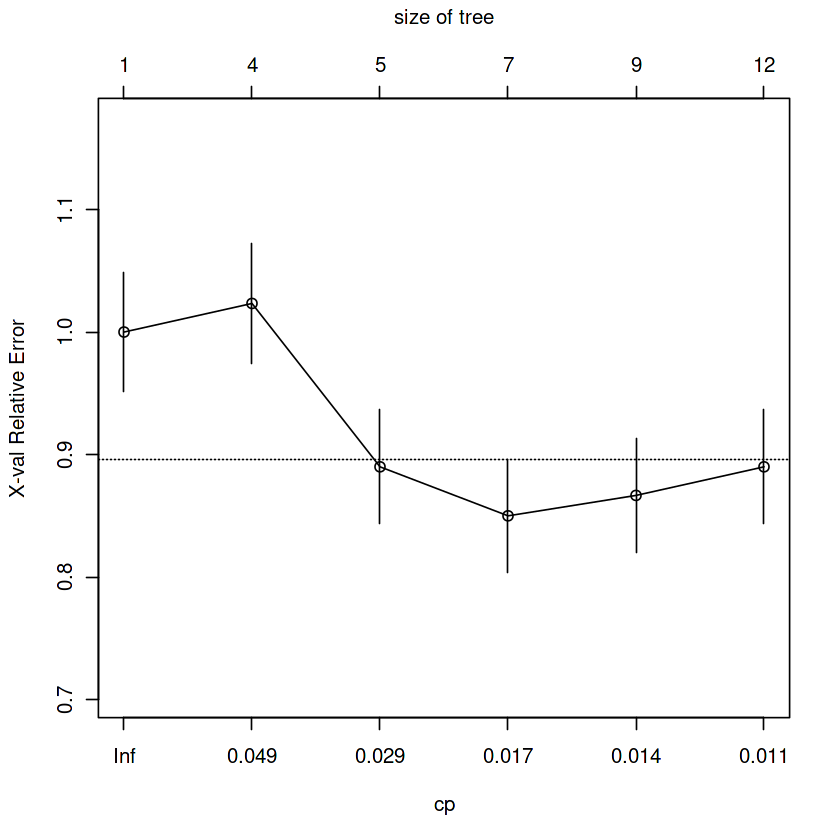

In [ ]:
plotcp(tree_model)

In [ ]:
summary(tree_model)

Call:
rpart(formula = Default ~ ., data = bank_loan, method = "class")
  n= 1000 

          CP nsplit rel error    xerror       xstd
1 0.05166667      0 1.0000000 1.0000000 0.04830459
2 0.04666667      3 0.8400000 1.0233333 0.04861995
3 0.01833333      4 0.7933333 0.8900000 0.04663225
4 0.01666667      6 0.7566667 0.8500000 0.04594381
5 0.01111111      8 0.7233333 0.8666667 0.04623611
6 0.01000000     11 0.6900000 0.8900000 0.04663225

Variable importance
checkingstatus1        duration         purpose         history          amount 
             34              16              14              12              11 
        savings             age          employ 
             10               2               1 

Node number 1: 1000 observations,    complexity param=0.05166667
  predicted class=0  expected loss=0.3  P(node) =1
    class counts:   700   300
   probabilities: 0.700 0.300 
  left son=2 (457 obs) right son=3 (543 obs)
  Primary splits:
      checkingstatus1 splits as  RRLL,

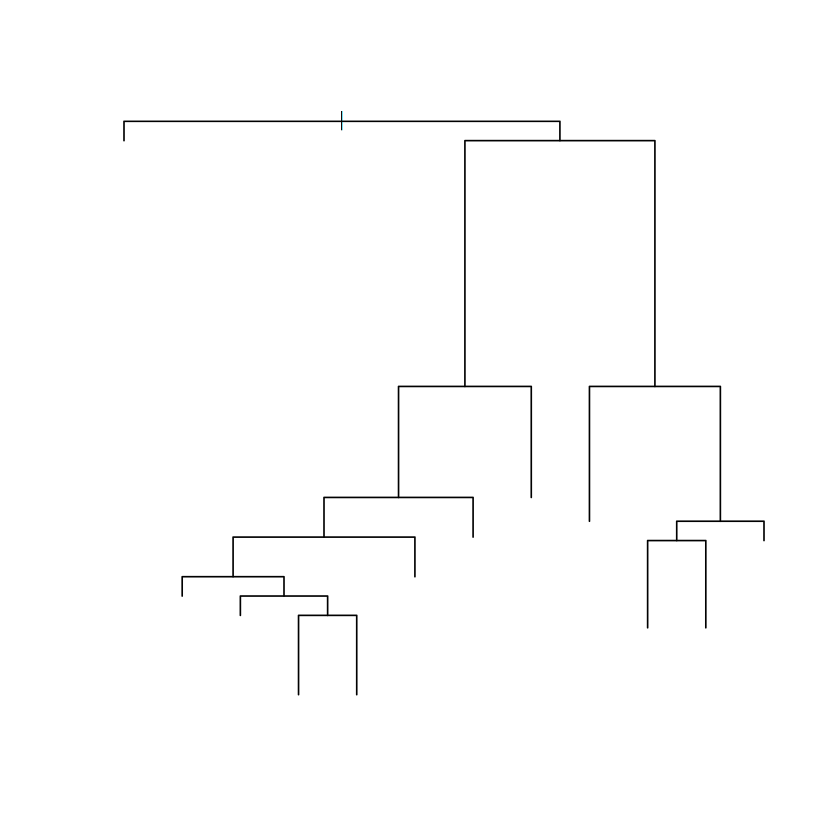

In [ ]:
plot(tree_model)

In [ ]:
#k-fold cross validation
folded_up <- createFolds(bank_loan, k=10, list=TRUE, returnTrain=FALSE)
train_set <- names(folded_up[1])
bank_loan[folded_up$train_set,]

Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,residence,age,otherplans,cards,tele
<fct>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>
